# HOMEWORK 5 ADM 

In [58]:
data = {'Name': ['Ramona Tarantino', 'Nicola', 'MIchela', 'Gianmarco'],
        'Matricula': [2082006, 347842, 2343838, 338748],
        'Email': ['ramonatarantino@gmail.com', 'email', 'email', 'email']}

In [60]:
data = pd.DataFrame(data)


In [61]:
display(data)

,Name,Matricula,Email
0,Ramona Tarantino,2082006,ramonatarantino@gmail.com
1,Nicola,347842,email
2,MIchela,2343838,email
3,Gianmarco,338748,email


In [63]:
import pandas as pd
import networkx as nx
import numpy as np


## Dataset

In [121]:
edges_df = pd.read_csv("edges.csv")
edges_df

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [4]:
hero_network = pd.read_csv('hero-network.csv')
hero_network 

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [5]:
nodes = pd.read_csv('nodes.csv')
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


## LEZIONE 13_12 

### ADDING NODES


In [ ]:
import networkx as nx

# Create a new graph
G = nx.Graph()

# Add some nodes and edges to the graph 
G.add_node(1) #we pass the label of the node 
G.add_nodes_from([2,3])

G.nodes()
# Draw the graph
nx.draw(G)



In [ ]:
G.nodes()[1]['name'] = 'Spiderman'
G.nodes()[1]

In [ ]:
G.add_nodes_from([(4,{'name' :'Thor'}), (15, {'comic': 'Peter Parker'})])

In [ ]:
G.nodes()

In [ ]:
G.remove_node(4)

### ADDING EDGES + ATTRIBUTES

In [ ]:
G.add_edge(1,2)

In [ ]:
G.add_edges_from([(2,3), (1,4), (2,15)])

In [ ]:
G.edges()

In [ ]:
G.edges()[(1,2)]['weight'] =0.5
G.edges()[(1,2)]

In [ ]:
list(G.edges)

In [ ]:
G.remove_edge(2,15)

In [ ]:
nx.draw(G)

### STATS

In [ ]:
nx.info(G)

In [ ]:
G.degree(15)

### ADJACENCY

In [ ]:
G[1] #vede a chi è connesso

In [ ]:
G[2]

In [ ]:
G.nodes.data()

### VISUALIZATION

In [ ]:
G.add_edge(2,15)

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
nx.draw(G, with_labels=True, node_color= 'limegreen')
plt.show()


In [ ]:
C= nx.complete_graph(20)
nx.draw(C, with_labels=True, node_color= 'limegreen')

In [ ]:
H=nx.cycle_graph(5)
nx.draw(H, with_labels=True, node_color= 'limegreen')

In [ ]:
L =nx.lollipop_graph(6,3)
nx.draw(L, with_labels=True, node_color= 'limegreen')

In [ ]:
SG = L.subgraph([6,7,8])
nx.draw(SG, with_labels=True, node_color= 'limegreen')

In [ ]:
HL = nx.union(H, L, rename=('H-', 'L-'))

In [ ]:
nx.draw(HL, with_labels=True, node_color= 'limegreen')

In [ ]:
G = nx.complete_graph(4)

In [ ]:
nx.draw(G, with_labels=True, node_color= 'limegreen')

In [ ]:
nx.is_connected(G)

### GRAPH SETUP

In [ ]:
import pandas as pd 
G_hero_net = nx.MultiGraph()

In [ ]:
hero_network

In [ ]:
G_hero_net.add_edge(hero_network.loc[0].hero1, hero_network.loc[0].hero2)

In [ ]:
G_hero_net.nodes

In [ ]:
hero_network.loc[0]

In [ ]:
hero_network.apply(lambda row: G_hero_net.add_edge(row['hero1'], row['hero2']), axis=1)

In [ ]:
#create a new GRAPG 

G_hero_2 = nx.from_pandas_edgelist(hero_network, 'hero1', 'hero2', create_using = nx.MultiGraph)

In [ ]:
nx.info(G_hero_2)

In [ ]:
nx.degree_centrality(G_hero_net)['PRINCESS ZANDA']

In [ ]:
nx.betweenness_centrality(G_hero_net)['PRINCESS ZANDA']

In [ ]:
nx.node_connectivity(G_hero_net,'PRINCESS ZANDA', "BLACK PANTHER/T'CHAL")

In [ ]:
G_hero_net.nodes()

### FINE LEZIONE 

# 1. Data

### DATA PREPROCESSING
- Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'.
- Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.
- The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'.


In [ ]:
import csv
import re

# Read the hero-network.csv file
with open('hero-network.csv', 'r') as f:
    reader = csv.reader(f)
    
    # Create a new list to hold the cleaned data
    cleaned_data = []
    
    # Loop through the rows in the CSV file
    for row in reader:
        # Use a regular expression to remove the extra spaces from the names
        # in the row
        cleaned_row = [re.sub(r' +', '', name) for name in row]
        
        
        # Add the cleaned row to the list
        cleaned_data.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open('hero-network-cleaned.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(cleaned_data)

    #questo funziona

In [ ]:
# find the names that appear in both sets of names
import pandas as pd
df1 = pd.read_csv('hero-network-cleaned.csv')

# read the second dataset into a dataframe
df2 = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in the first dataset
hero_names1 = set(df1['hero1']) | set(df1['hero2'])

# create a set of hero names from the hero column in the second dataset
hero_names2 = set(df2['hero'])

common_names = df1[df1['hero1'].isin(hero_names2) | df1['hero2'].isin(hero_names2)]

# print the common names
print(common_names)

common_names.count()


In [ ]:
# read the hero-network.csv file into a dataframe
import pandas as pd
hero_network_df = pd.read_csv('hero-network.csv')

# read the edges.csv file into a dataframe
edges_df = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in hero-network.csv
hero_network_names = set(hero_network_df['hero1']) | set(hero_network_df['hero2'])

# create a set of hero names from the hero column in edges.csv
edges_names = set(edges_df['hero'])

# find the names that appear in hero-network.csv but not in edges.csv
# and remove any extra spaces and the extra '/' from the end of the names
missing_names = [name.strip()[:-1] for name in hero_network_names - edges_names if name[-1] == '/']

# update the names in hero-network.csv to match the names in edges.csv
hero_network_df.loc[hero_network_df['hero1'].isin(missing_names), 'hero1'] = missing_names
hero_network_df.loc[hero_network_df['hero2'].isin(missing_names), 'hero2'] = missing_names

# write the updated dataframe to a new csv file
hero_network_df.to_csv('hero-network-corrected.csv', index=False)


In [ ]:
print(missing_names)

In [ ]:
hero_network_df_corrected = pd.read_csv('hero-network-corrected.csv')
hero_network_df_corrected 

In [ ]:


# load the dataset into a pandas DataFrame
hero_network_df_corrected = pd.read_csv('hero-network.csv')

# replace the string 'SPIDER-MAN/PETER PAR' with 'SPIDER-MAN/PETER PARKER' in columns 'hero1' and 'hero2'
hero_network_df_corrected['hero1'] = hero_network_df_corrected['hero1'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')
hero_network_df_corrected['hero2'] = hero_network_df_corrected['hero2'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')

# save the modified DataFrame to a new CSV file
hero_network_df_corrected.to_csv('modified-hero-network.csv', index=False)


In [7]:
df = pd.read_csv('modified-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [ ]:
df[df.hero1 == 'SPIDER-MAN/PETER PARKER']

In [ ]:
df[df.hero2 == 'SPIDER-MAN/PETER PARKER']

In [ ]:
df

- Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

In [ ]:
df_subset = df[df['hero1'] != df['hero2']]

# save the new DataFrame to a new CSV file
df_subset.to_csv('final-hero-network.csv', index=False)

In [16]:
df = pd.read_csv('final-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
572230,COLOSSUS II/PETER RA,CALLISTO
572231,CALLISTO,ROGUE /
572232,CALLISTO,CALIBAN/
572233,CALIBAN/,ROGUE /


In [9]:
count = df[df['hero1'] == df['hero2']].shape[0]

# print the count
print(count)

#OK IT WORKS, there's not the duplicate rows

0


In [17]:
df = df[df['hero1'] != df['hero2']]

In [19]:
df.to_csv('final-hero-network2.csv', index=False)

In [20]:
df = pd.read_csv('final-hero-network2.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
572230,COLOSSUS II/PETER RA,CALLISTO
572231,CALLISTO,ROGUE /
572232,CALLISTO,CALIBAN/
572233,CALIBAN/,ROGUE /


#### 'final-hero-network2.csv' is the final dataset preprocessed

### Graphs setup

**First graph** : Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. The graph should be considered weighted and undirected. It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.



In [88]:
df_hero = pd.read_csv('final-hero-network2.csv')
edge_df = df_hero.groupby(['hero1', 'hero2']).size().reset_index(name='weight')
G = nx.from_pandas_edgelist(edge_df, 'hero1', 'hero2', edge_attr='weight', create_using = nx.MultiGraph)


In [44]:
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 6426
Number of edges: 224169


In [46]:
nx.info(G)

'MultiGraph with 6426 nodes and 224169 edges'

This will create a graph with the nodes and edges as specified in the 'hero-network.csv' file, with edges that have a weight attribute equal to the number of times the two heroes have collaborated in different comics. The cost of the edge will be lower for heroes with more collaborations, as requested.

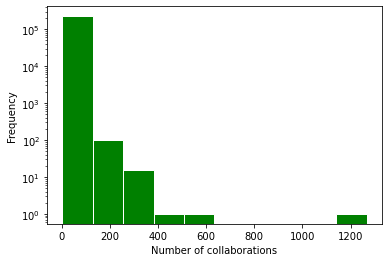

In [104]:
import matplotlib.pyplot as plt

# Get the edge weights from the graph
edge_weights = nx.get_edge_attributes(G, 'weight')

# Convert the edge weights to a list
weights = list(edge_weights.values())

# Plot a histogram of the edge weights
plt.hist(weights, color = 'green', log=True, edgecolor = 'white')
plt.xlabel('Number of collaborations')
plt.ylabel('Frequency')
plt.show()


This will plot a histogram of the edge weights in the graph, with the x-axis representing the number of collaborations and the y-axis representing the frequency of each value. Plot to verify that the cost of the edge is lower for heroes with more collaborations.

### SECOND GRAPH

In [90]:
import pandas as pd
import networkx as nx

# Read the nodes data from nodes.csv into a DataFrame
nodes_df = pd.read_csv('nodes.csv')

# Read the edges data from edges.csv into a DataFrame
edges_df = pd.read_csv('edges.csv')

# Create a graph from the edges DataFrame
G2 = nx.from_pandas_edgelist(edges_df, 'hero', 'comic')

# Set the node type as an attribute of the nodes in the graph
nodes_df = nodes_df.set_index('node')
node_types = nodes_df['type']
nx.set_node_attributes(G2, node_types, 'type')


In [91]:
nx.info(G2)

'Graph with 19090 nodes and 96104 edges'

This code will create an undirected, unweighted graph with nodes for each hero and comic in the data, and edges between heroes and comics indicating which heroes appear in which comics. The node type (hero or comic) will be stored as an attribute of the node.

### Save the two graphs in a pickle files 

In [93]:
import pickle

# Save the graph to a file using pickle
with open('graph1.pickle', 'wb') as f:
    pickle.dump(G, f)
    
with open('graph2.pickle', 'wb') as f:
    pickle.dump(G2, f)
    

In [94]:
with open('graph1.pickle', 'rb') as f:
    G1 = pickle.load(f)


In [96]:
nx.info(G1)

'MultiGraph with 6426 nodes and 224169 edges'

In [97]:
with open('graph2.pickle', 'rb') as f:
    G2 = pickle.load(f)

## 2. Backend Implementation

Definition: As the number of nodes and edges grows, we may request to work on a subset of the data to reduce computation time and improve network visualization. In this case, we will ask you only to consider the data for top N heros. We define the top N heroes as follows:
- **Top N heroes**: The **top N heroes who have appeared in the most number of comics**. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

In [17]:
import pandas as pd

In [7]:
edges_df = pd.read_csv('edges.csv')
comic_counts = edges_df['hero'].value_counts()
# Select the top N heroes
N = 10
top_heroes = comic_counts.head(N)
# Create a new DataFrame that includes only the data for the top heroes
top_heroes_df = edges_df[edges_df['hero'].isin(top_heroes.index)]

display(top_heroes_df)


,hero,comic
11116,CAPTAIN AMERICA,A '00
11117,CAPTAIN AMERICA,A 1
11118,CAPTAIN AMERICA,A 10
11119,CAPTAIN AMERICA,A 100
11120,CAPTAIN AMERICA,A 101
...,...,...
94166,WOLVERINE/LOGAN,XU 9
94167,WOLVERINE/LOGAN,XV.A 1
94168,WOLVERINE/LOGAN,XV.A 2
94169,WOLVERINE/LOGAN,XV.A 3


In [8]:
# save top_heroes_df in a file csv 
top_heroes_df.to_csv('top_heroes.csv', index=False)

In [12]:
#read top_heroes_df
top_heroes_df = pd.read_csv('top_heroes.csv')

The goal of this part is the implementation of a controller system that has different functionalities. The controller should take as input an identifier "i" and run the associated function_i applied to the graph you create from the downloaded data.

In [ ]:
# Define the functions for the different functionalities
def function_1(G):
    # Functionality 1
    print('Functionality 1')

def function_2(G):
    # Functionality 2
    print('Functionality 2')
    
    


In [ ]:
# Create a dictionary mapping the identifier i to the function function_i
functions = {
    1: function_1,
    2: function_2
}

In [ ]:
# Read the identifier i from the user
i = int(input('Enter an identifier: '))

# Look up the function corresponding to the identifier i
func = functions[i]

# Execute the function on the graph
func(G)

In [18]:
import pickle
import pandas as pd
import networkx as nx


In [19]:
# read a second graph from a pickle file
G2 = pd.read_pickle(r'graph2.pickle')

In [163]:
# create 2 lists of all the heros and all the comics from the second graph
#N = 100
#G2_sub = nx.subgraph(G2, list(edges_df['hero'].value_counts().head(N).index) +   
                         #list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))
        
G2_type = list(G2.nodes(data='type'))
G2_h = []
G2_c = []
for x in G2_type:
    if x[1] == 'hero':
        G2_h.append(x[0])
    else:
        G2_c.append(x[0])


In [199]:
# create a random list of n heros from G2_h(the list of all heroes of the
# second graph) for run the Functionality 3
# and create h_1 and h_n random too 
import random 
random.seed(1145) #reproducibitily
n = 5 # length of the list 
i = 0 
h = []
while i < n+2:
    x = random.choice(G2_h)
    if x not in h:
        h.append(x)
        i += 1


h_1 = h[len(h)-1]
h_n = h[len(h)-2]
h.pop()
h.pop()
print(h,h_1,h_n)

['DREADFACE', 'SAPIR, HERSCHEL', 'HODER [ASGARDIAN]', 'SARIEL', 'JONES, RICHARD MILHO'] UNDERTAKER/CONRAD EI DISCUS


In [147]:
# shortest walk 
def S_W(G, s, g):
    stillvisit = [] # list of the explored nodes
    queue = [[s]]   # list used like a queue 
    if s == g:
        return
    while queue:
        path = queue.pop(0)          #remuve the last node 
        node = path[-1]              # consider the last node in the queue
        if node not in stillvisit:   # check if the node is visited
            #if node not in G:
                #return None 
            #else:
            neightbours = G[node]    # get all the neighbours of the node

            for x in neightbours: 
                path_n = list(path)  
                path_n.append(x)     # path_n is a temporary list
                queue.append(path_n)

                if x == g:
                    return [x for x in path_n if x in G2_c] # get only the comics between heros 



            stillvisit.append(node)
    return None

In [200]:
# function to merge a list of lists into a single list
def flatten(l):
    return [i for sublist in l for i in sublist]


This function return the shortest walk between h_1 and h_n, which visit in order the nodes in h 

In [161]:
def functionality_3(G, h_1, h_n, h, N=None):
    if N is None:
        G_sub = G
    else:
        G_sub = nx.subgraph(G, list(edges_df['hero'].value_counts().head(N).index) +   
                         list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))
        
    N_S_P= True
    final_path = []
    if  S_W(G_sub, h_1, h[0]) != None: 
        final_path.append(S_W(G_sub, h_1, h[0]))
    else:
       N_S_P = False 
    for i in range(len(h)-1):
        if  S_W(G_sub, h[i], h[i+1]) != None:
            final_path.append(S_W(G_sub, h[i], h[i+1]))
        else:
            N_S_P = False
    if  S_W(G_sub, h[len(h)-1], h_n) != None and N_S_P == True: 
        final_path.append( S_W(G_sub, h[len(h)-1], h_n))
        f_path= [x[:-1] for x in final_path]
        return f'the path is : {flatten(f_path)}'
    else: 
        return 'there is no such path'
 


In [162]:
f = functionality_3(G2, h_1, h_n, h, 100 )
f


"the path is : ['A 118']"

In [201]:
def dijkstra(G, s, g):
    S_P= {s: (None, 0)}
    current = s
    visited = set()

    while current != g:
        visited.add(current)
        destinations = list(G[current])
        dist_to_current = S_P[current][1] 

        for next in destinations:
            dist = 1 + dist_to_current  
            if next not in S_P:
                S_P[next] = (current, dist)
            else:
                S_dist_current = S_P[next][1]
                if S_dist_current > dist:
                    S_P[next] = (current, dist)

        next_destinations = {node: S_P[node] for node in S_P if node not in visited}
        if not next_destinations: return None
        current = min(next_destinations, key=lambda x: next_destinations[x][1])

    final_P =[]
    while current is not None:
        final_P.append(current)
        next = S_P[current][0]
        current = next
    final_P = final_P[::-1]
    return final_P

In [207]:
dijkstra(G2, h[0], h[1])

['DREADFACE',
 'FF 26',
 'ANT-MAN/DR. HENRY J.',
 'A 11',
 'SPIDER-MAN/PETER PARKER',
 'ASM 345',
 'SAPIR, HERSCHEL']

In [208]:
def functionality_3(G, h_1, h_n, h, N = None):
    F_P = []
    if N is None:
        G_sub = G
    else:
        G_sub = nx.subgraph(G, list(edges_df['hero'].value_counts().head(N).index) +   
                         list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))

    if h_1 not in G_sub or h_n not in G_sub : return 'there is no such path'
    for hero in h: 
        if hero not in G_sub : return 'there is no such path'
    dij_1 = dijkstra(G_sub, h_1, h[0])
    if dij_1 is None: return 'there is no such path'
    else: F_P.append(dij_1[:-1])

    for i in range(len(h)-1):
        dij_i = dijkstra(G_sub, h[i], h[i+1])
        if dij_i is None: return 'there is no such path'
        else: F_P.append(dij_i[:-1])
    
    dij_n = dijkstra(G_sub, h[-1], h_n)
    if dij_n is None: return 'there is no such path'
    else: F_P.append(dij_n)
    F_P = flatten(F_P)

    F_comics_P = [x for x in F_P if x in G2_c]
    return  F_P, F_comics_P


    
        

In [209]:
F_P, F_comics_P = functionality_3(G2, h_1, h_n, h)
F_comics_P


['AAF 16',
 'FF 26',
 'FF 26',
 'A 11',
 'SPIDER-MAN/PETER PARKER',
 'ASM 345',
 'ASM 345',
 'TB 25',
 'M/SH3 5',
 'M/SH3 5',
 'DAMCON2 4',
 'PUN4 3',
 'PUN4 3',
 'H2 395',
 'A 1',
 'IM 126']

In [210]:
F_P

['UNDERTAKER/CONRAD EI',
 'AAF 16',
 'HULK/DR. ROBERT BRUC',
 'FF 26',
 'DREADFACE',
 'FF 26',
 'ANT-MAN/DR. HENRY J.',
 'A 11',
 'SPIDER-MAN/PETER PARKER',
 'ASM 345',
 'SAPIR, HERSCHEL',
 'ASM 345',
 'BOOMERANG/FRED MYERS',
 'TB 25',
 'THOR/DR. DONALD BLAK',
 'M/SH3 5',
 'HODER [ASGARDIAN]',
 'M/SH3 5',
 'THOR/DR. DONALD BLAK',
 'DAMCON2 4',
 'PUNISHER II/FRANK CA',
 'PUN4 3',
 'SARIEL',
 'PUN4 3',
 'PUNISHER II/FRANK CA',
 'H2 395',
 'JONES, RICHARD MILHO',
 'A 1',
 'IRON MAN/TONY STARK',
 'IM 126',
 'DISCUS']

In [224]:
functionality_3(G2, h_1, h_n, h, 5500)

'there is no such path'

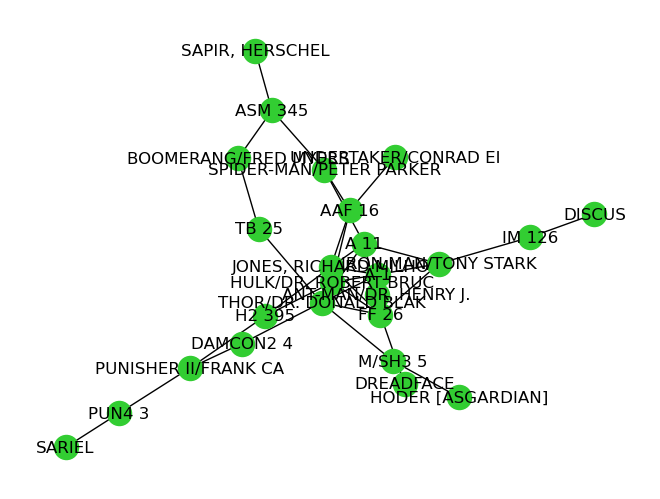

In [225]:
import matplotlib.pyplot as plt
G2_sub_plot = nx.subgraph(G2, F_P)
nx.draw(G2_sub_plot, with_labels=True, node_color= 'limegreen' )
#nx.draw(G2, with_labels=False, node_color= 'blue' )